# Networks with optimization

The previous notebooks has relied on gradient descent for the update of parameters. In addition, we have used the whole dataset when performing the upgrades. In this notebook we will try out some other concepts of optimization in networks (and also introducing mini-batches), namely:

* standard gradient descent
* gradient descent with momentum
* Adam (Adaptive Moment Estimation) optimization
* learning rate decay

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils.data_utils import cluster_dataset_6, plot_decision_boundary, plot_results

from networks_w_optimization import (
    DeepNetworkOptim,
    exp_weigthed_learning_rate_decay,
    schedule_learning_rate_decay
)

## Load data

Start by loading the synthesized data. The data contains two different clusters.

In [2]:
# Load cluster data
X_train, y_train, X_test, y_test = cluster_dataset_6()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (2, 400)
y_train shape: (1, 400)
X_test shape: (2, 200)
y_test shape: (1, 200)


Text(0.5, 0, 'x1')

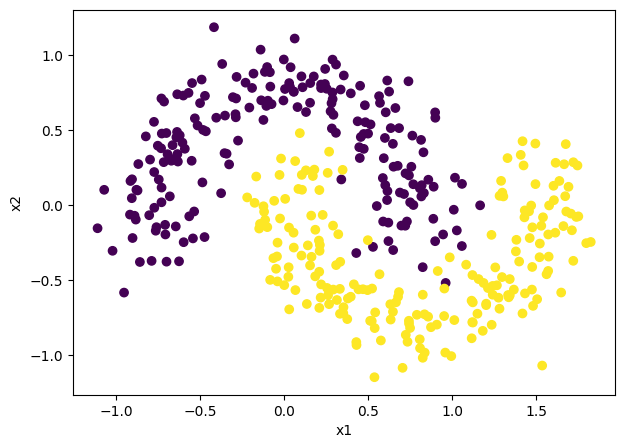

In [3]:
# Visualize training cluster
plt.figure(figsize=(7, 5))
plt.scatter(X_train[0, :], X_train[1, :], c=y_train)
plt.ylabel('x2')
plt.xlabel('x1')

Text(0.5, 0, 'x1')

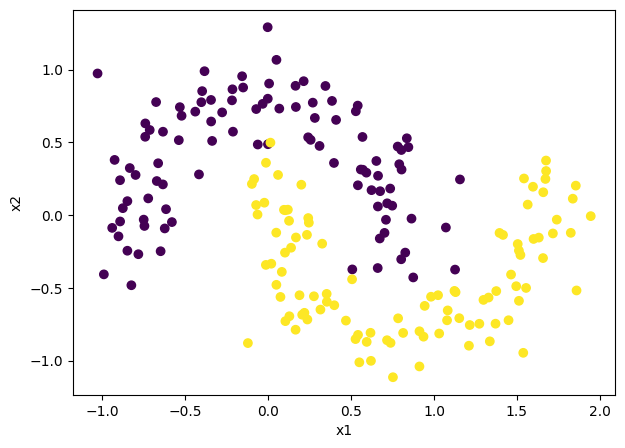

In [4]:
# Visualize test cluster
plt.figure(figsize=(7, 5))
plt.scatter(X_test[0, :], X_test[1, :], c=y_test)
plt.ylabel('x2')
plt.xlabel('x1')

In [5]:
# Define model architecture
layer_dims = [X_train.shape[0], 5, 2, y_train.shape[0]]

## Mini-batch gradient descent

We start by training a model using mini-batch gradient descent.

Mini-batches is a nice approach to speed up training while at the same time get good results. By iterating over our mini-batches and averaging the results we can train models faster.

In [6]:
# Instantiate base model
base_model = DeepNetworkOptim()

# Train model using mini-batches with gradient descent
base_model.call(X_train, y_train, layer_dims,
                optimizer='gd',
                mini_batch_size=64,
                num_epochs=5000,
                learning_rate=0.0007,
                print_cost=True)

Cost after epoch 0: 0.6930356657015346
Cost after epoch 1000: 0.6914578734007633
Cost after epoch 2000: 0.6855367350552556
Cost after epoch 3000: 0.6783281103810007
Cost after epoch 4000: 0.668637586489372
Cost after epoch 4999: 0.657056206939452


Training data preformance:
Accuracy: 0.65
Logloss: 0.6569122557433933
F1 score: 0.5205479452054794
Test data preformance:
Accuracy: 0.68
Logloss: 0.6516117906417263
F1 score: 0.5733333333333333


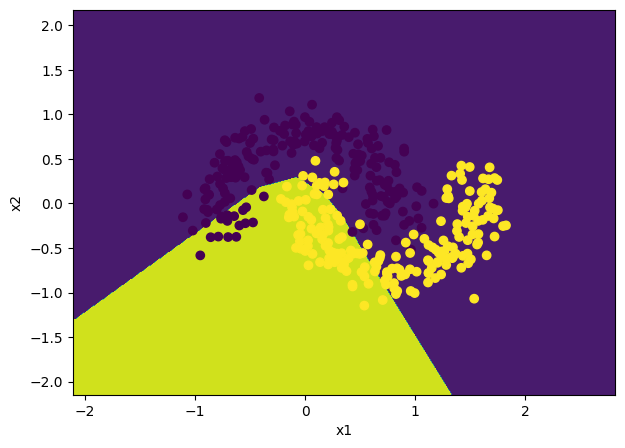

In [7]:
# Print results
plot_results(base_model, X_train, y_train, X_test, y_test)

Text(0.5, 1.0, 'Learning curve - Mini-batch gradient descent')

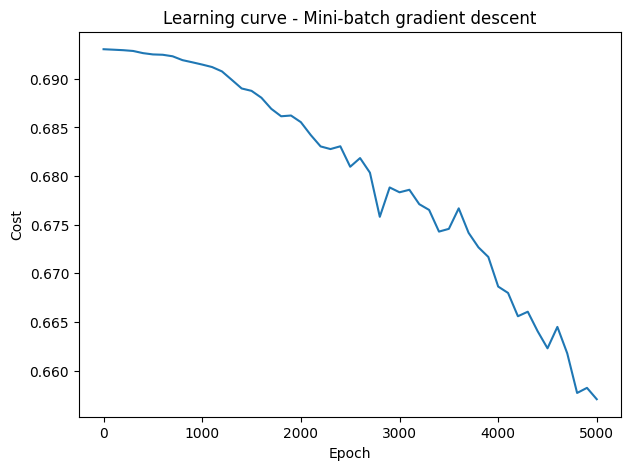

In [8]:
# Plot learning curve
plt.figure(figsize=(7,5))
plt.plot(base_model.learning_curve[:, 0], base_model.learning_curve[:, 1])
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.title('Learning curve - Mini-batch gradient descent')

## Mini-batch gradient descent with momentum

Next, we train a model using mini-batch gradient descent with momentum.

Momentum (utilizing an exponential moving average approach) can reduce the oscillations when performing gradient descent. The approach takes into account previous gradients which has a smoothing effect.

In [9]:
# Instantiate model
momentum_model = DeepNetworkOptim()

# Train model using mini-batches with momentum
momentum_model.call(X_train, y_train, layer_dims,
                    optimizer='momentum',
                    beta=0.9,
                    mini_batch_size=64,
                    num_epochs=5000,
                    learning_rate=0.0007,
                    print_cost=True)

Cost after epoch 0: 0.6930355860122314
Cost after epoch 1000: 0.6914676054371203
Cost after epoch 2000: 0.6855562442538305
Cost after epoch 3000: 0.6783526063167437
Cost after epoch 4000: 0.6686747462375197
Cost after epoch 4999: 0.6571085267544102


Training data preformance:
Accuracy: 0.65
Logloss: 0.6569649797181532
F1 score: 0.5205479452054794
Test data preformance:
Accuracy: 0.68
Logloss: 0.6516798607521602
F1 score: 0.5733333333333333


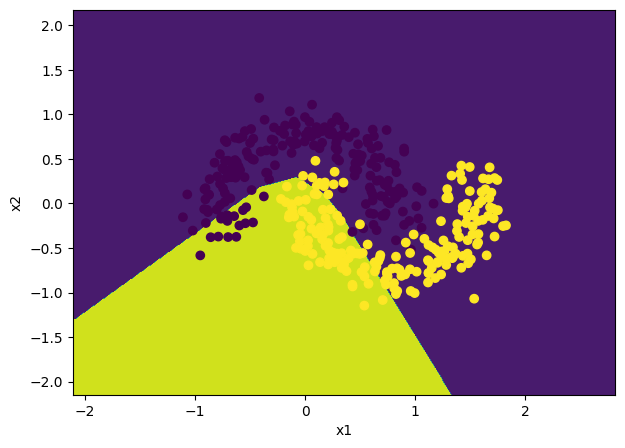

In [10]:
# Print results
plot_results(momentum_model, X_train, y_train, X_test, y_test)

Text(0.5, 1.0, 'Learning curve - Mini-batch gradient descent with momentum')

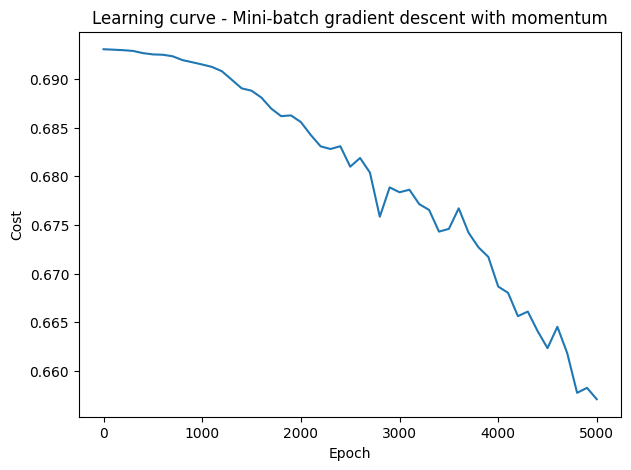

In [11]:
# Plot learning curve
plt.figure(figsize=(7,5))
plt.plot(momentum_model.learning_curve[:, 0], momentum_model.learning_curve[:, 1])
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.title('Learning curve - Mini-batch gradient descent with momentum')

## Mini-batch gradient descent with Adam

Next, we train a model using the Adam optimization algorithm on our mini-batches.

Like momentum the Adam algorithm takes previous gradients and second moment gradients into account which has a smoothing effect on the parameter update. In effect it takes the approach of momentum and RMSProp and combines the two.

In [12]:
# Instantiate model
adam_model = DeepNetworkOptim()

# Train model using mini-batches with Adam
adam_model.call(X_train, y_train, layer_dims,
                optimizer='adam',
                beta1=0.9,
                beta2=0.999,
                epsilon=1e-8,
                mini_batch_size=64,
                num_epochs=5000,
                learning_rate=0.0007,
                print_cost=True)

Cost after epoch 0: 0.6930084904013807
Cost after epoch 1000: 0.25350659203349907
Cost after epoch 2000: 0.08697598736394827
Cost after epoch 3000: 0.07432254155579361
Cost after epoch 4000: 0.06436884621000616
Cost after epoch 4999: 0.05797237478033158


Training data preformance:
Accuracy: 0.975
Logloss: 0.06375221181062798
F1 score: 0.9751243781094527
Test data preformance:
Accuracy: 0.98
Logloss: 0.07305457224139932
F1 score: 0.9803921568627451


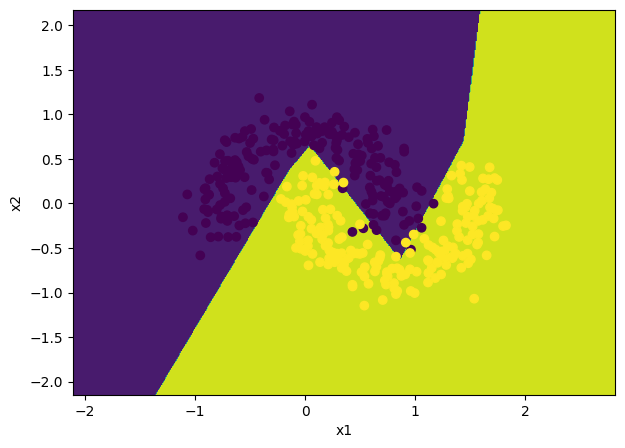

In [13]:
# Print results
plot_results(adam_model, X_train, y_train, X_test, y_test)

Text(0.5, 1.0, 'Learning curve - Mini-batch with Adam')

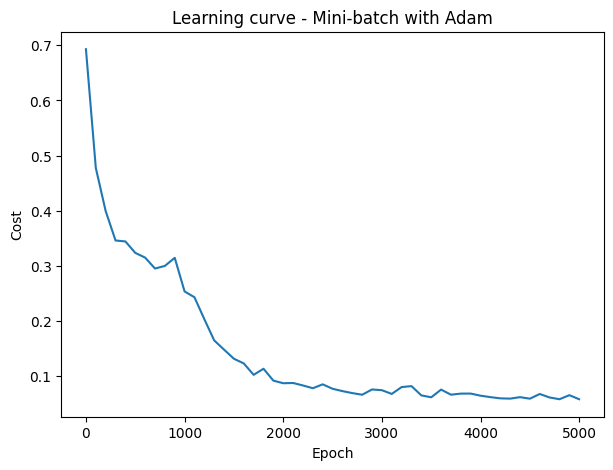

In [14]:
# Plot learning curve
plt.figure(figsize=(7,5))
plt.plot(adam_model.learning_curve[:, 0], adam_model.learning_curve[:, 1])
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.title('Learning curve - Mini-batch with Adam')

## Learning rate decay

Next, we train a model using learning rate decay.

So far we've only used the same learning rate over all epochs. One approach to achieve better performance is to reduce learning rate during training. This can be done in several ways but here we will reduce the learning rate using exponential weighted decay per epoch.

In [15]:
# Instantiate model
decay_model = DeepNetworkOptim()

# Train model using mini-batche gradient descent
# with learning rate decay
decay_model.call(X_train, y_train, layer_dims,
                 optimizer='gd',
                 decay=exp_weigthed_learning_rate_decay,
                 decay_rate=1.0,
                 mini_batch_size=64,
                 num_epochs=5000,
                 learning_rate=0.1,
                 print_cost=True)

Cost after epoch 0: 0.6930455724983755
Cost after epoch 1000: 0.6902712238416886
Cost after epoch 2000: 0.6900291833701243
Cost after epoch 3000: 0.6898663866330003
Cost after epoch 4000: 0.6887936146845689
Cost after epoch 4999: 0.689054945568592


Training data preformance:
Accuracy: 0.6
Logloss: 0.6889785736799012
F1 score: 0.33884297520661155
Test data preformance:
Accuracy: 0.595
Logloss: 0.6893243202477847
F1 score: 0.319327731092437


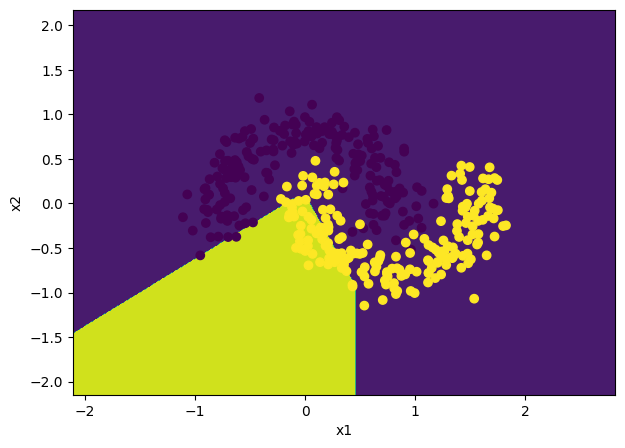

In [16]:
# Print results
plot_results(decay_model, X_train, y_train, X_test, y_test)

Text(0.5, 1.0, 'Learning curve - Mini-batch with learning rate decay')

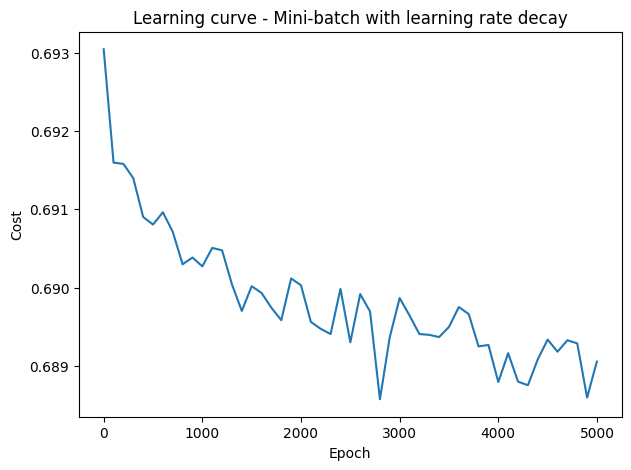

In [17]:
# Plot learning curve
plt.figure(figsize=(7,5))
plt.plot(decay_model.learning_curve[:, 0], decay_model.learning_curve[:, 1])
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.title('Learning curve - Mini-batch with learning rate decay')

Text(0.5, 1.0, 'Learning curve - Mini-batch with learning rate decay')

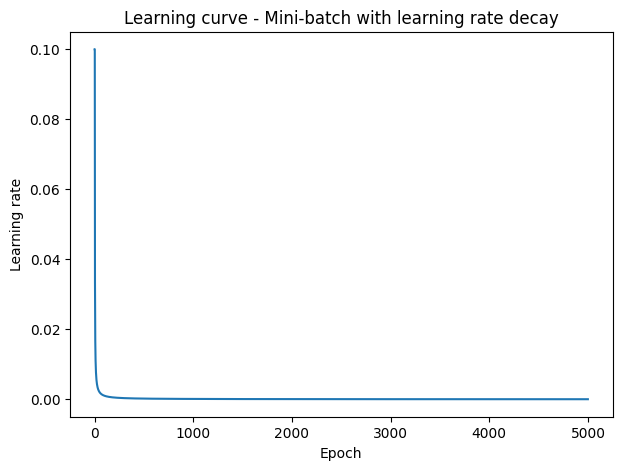

In [18]:
# Plot learning rate
plt.figure(figsize=(7,5))
plt.plot(decay_model.learning_rates[:, 0], decay_model.learning_rates[:, 1])
plt.ylabel('Learning rate')
plt.xlabel('Epoch')
plt.title('Learning curve - Mini-batch with learning rate decay')

The current learning rate decay quickly shrinks the learning rate towards zero.

## Scheduled learning rate decay

Next, we train a model with scheduled learning rate decay.

As can be seen above, a exponentail weight decay of learning rates per epoch shrinks the learning rate quickly to zero and the model is not performing that great. However, there is a way to shrink the learning rate (still using exponential weight decay) but in a slower maner.

In [19]:
# Instantiate model
sch_decay_model = DeepNetworkOptim()

# Train model using mini-batche gradient descent
# with learning rate decay
sch_decay_model.call(X_train, y_train, layer_dims,
                     optimizer='gd',
                     decay=schedule_learning_rate_decay,
                     decay_rate=1.0,
                     mini_batch_size=64,
                     num_epochs=5000,
                     learning_rate=0.1,
                     print_cost=True)

Cost after epoch 0: 0.6930455724983755
Cost after epoch 1000: 0.1109040078452063
Cost after epoch 2000: 0.08494494055078057
Cost after epoch 3000: 0.08151950067236184
Cost after epoch 4000: 0.0686234982307283
Cost after epoch 4999: 0.06295939021241125


Training data preformance:
Accuracy: 0.9825
Logloss: 0.06730047569241464
F1 score: 0.982716049382716
Test data preformance:
Accuracy: 0.985
Logloss: 0.06877800060511248
F1 score: 0.9850746268656716


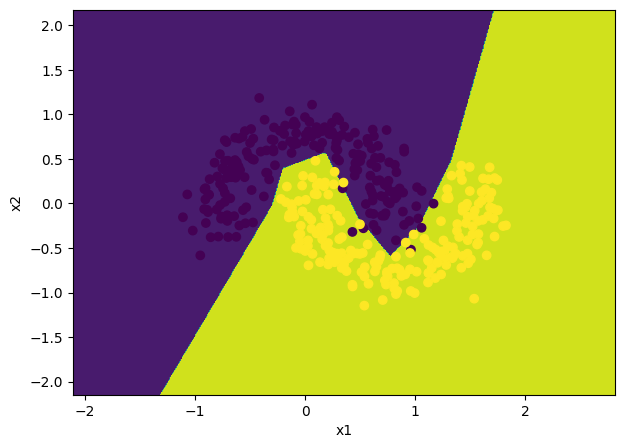

In [20]:
# Print results
plot_results(sch_decay_model, X_train, y_train, X_test, y_test)

Text(0.5, 1.0, 'Learning curve - Mini-batch with scheduled learning rate decay')

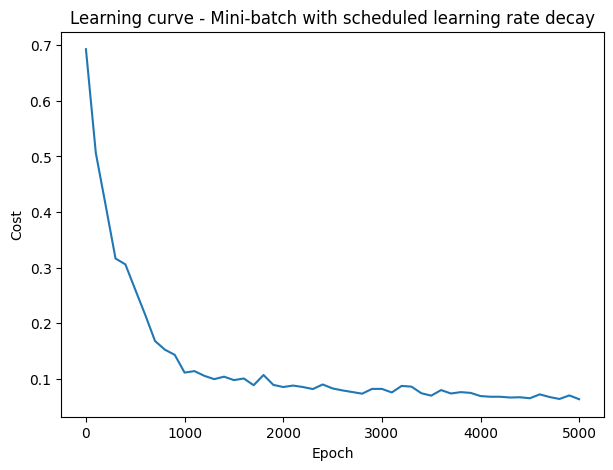

In [21]:
# Plot learning curve
plt.figure(figsize=(7,5))
plt.plot(sch_decay_model.learning_curve[:, 0], sch_decay_model.learning_curve[:, 1])
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.title('Learning curve - Mini-batch with scheduled learning rate decay')

Text(0.5, 1.0, 'Learning curve - Mini-batch with scheduled learning rate decay')

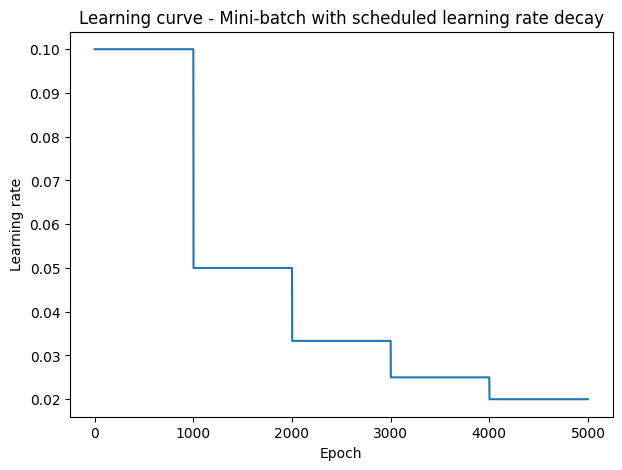

In [22]:
# Plot learning rate
plt.figure(figsize=(7,5))
plt.plot(sch_decay_model.learning_rates[:, 0], sch_decay_model.learning_rates[:, 1])
plt.ylabel('Learning rate')
plt.xlabel('Epoch')
plt.title('Learning curve - Mini-batch with scheduled learning rate decay')

The above plot show how we reduce the learning rate as we complete epochs but in a straicase kind of manner.

## Mini-batch gradient descent with momentum and learning rate decay

Next, we train a model combining momentum and the above learning rate decay approach.

In [23]:
# Instantiate model
mom_dec_model = DeepNetworkOptim()

# Train model using mini-batche gradient descent
# with learning rate decay
mom_dec_model.call(X_train, y_train, layer_dims,
                   optimizer='momentum',
                   beta=0.9,
                   decay=schedule_learning_rate_decay,
                   decay_rate=1.0,
                   mini_batch_size=64,
                   num_epochs=5000,
                   learning_rate=0.1,
                   print_cost=True)

Cost after epoch 0: 0.6930340800176015
Cost after epoch 1000: 0.11389951986850964
Cost after epoch 2000: 0.08340244185402454
Cost after epoch 3000: 0.0834426100941805
Cost after epoch 4000: 0.069839545742812
Cost after epoch 4999: 0.06422779712094166


Training data preformance:
Accuracy: 0.9825
Logloss: 0.0692789420356637
F1 score: 0.9826302729528535
Test data preformance:
Accuracy: 0.985
Logloss: 0.06710942332909559
F1 score: 0.9852216748768473


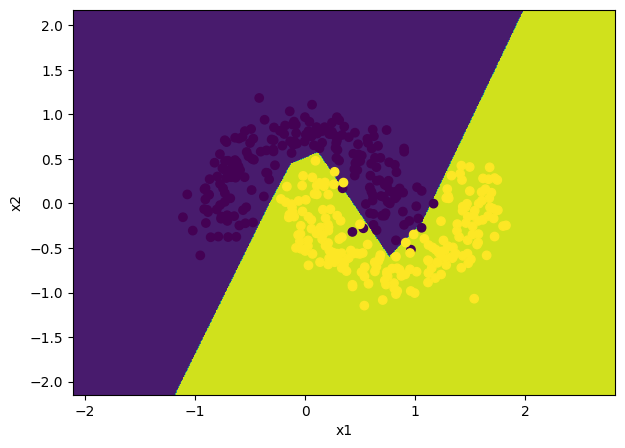

In [24]:
# Print results
plot_results(mom_dec_model, X_train, y_train, X_test, y_test)

Text(0.5, 1.0, 'Learning curve - Mini-batch with momentum and scheduled learning rate decay')

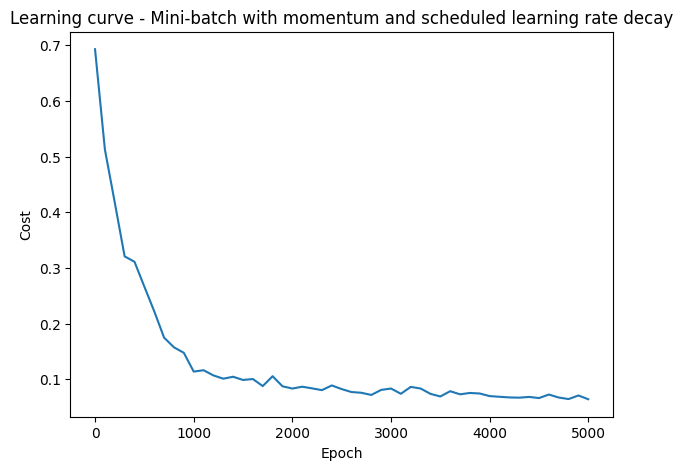

In [25]:
# Plot learning curve
plt.figure(figsize=(7,5))
plt.plot(mom_dec_model.learning_curve[:, 0], mom_dec_model.learning_curve[:, 1])
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.title('Learning curve - Mini-batch with momentum and scheduled learning rate decay')

The results are much better than when only using momentum.

## Mini-batch gradient descent using Adam and learning rate decay

Next, we do the same but instead of momentum we use the Adam algorithm.

In [26]:
# Instantiate model
adam_dec_model = DeepNetworkOptim()

# Train model using mini-batche gradient descent
# with learning rate decay
adam_dec_model.call(X_train, y_train, layer_dims,
                    optimizer='adam',
                    beta1=0.9,
                    beta2=0.999,
                    epsilon=1e-8,
                    decay=schedule_learning_rate_decay,
                    decay_rate=1.0,
                    mini_batch_size=64,
                    num_epochs=5000,
                    learning_rate=0.01,
                    print_cost=True)

Cost after epoch 0: 0.6914232346557471
Cost after epoch 1000: 0.05418025049946869
Cost after epoch 2000: 0.05244794222735488
Cost after epoch 3000: 0.07919935552692407
Cost after epoch 4000: 0.05698775438197119
Cost after epoch 4999: 0.0539052780849515


Training data preformance:
Accuracy: 0.9825
Logloss: 0.058607981057106365
F1 score: 0.982716049382716
Test data preformance:
Accuracy: 0.985
Logloss: 0.09343648112524837
F1 score: 0.9850746268656716


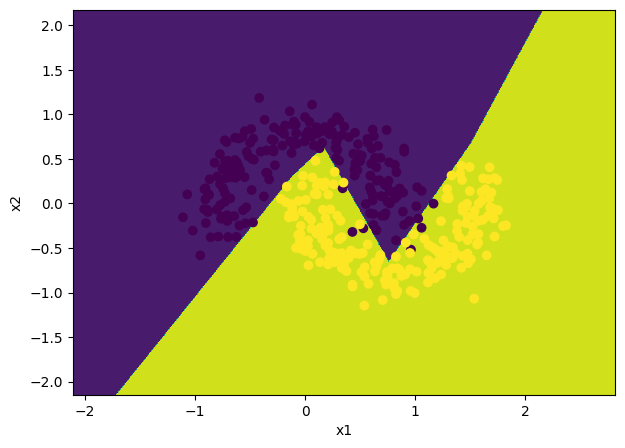

In [27]:
# Print results
plot_results(adam_dec_model, X_train, y_train, X_test, y_test)

Text(0.5, 1.0, 'Learning curve - Mini-batch with Adam and scheduled learning rate decay')

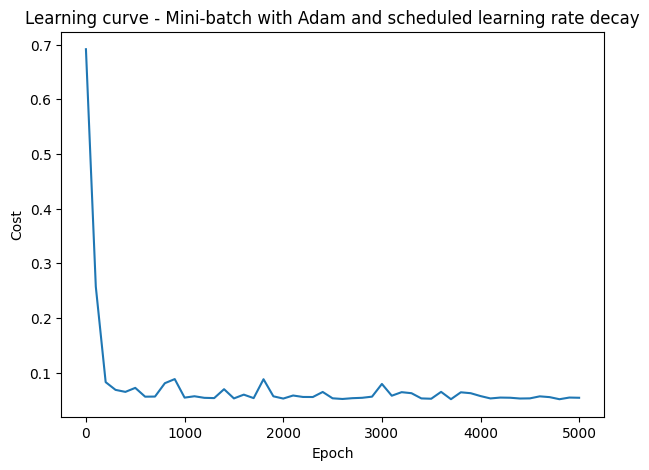

In [28]:
# Plot learning curve
plt.figure(figsize=(7,5))
plt.plot(adam_dec_model.learning_curve[:, 0], adam_dec_model.learning_curve[:, 1])
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.title('Learning curve - Mini-batch with Adam and scheduled learning rate decay')